In [33]:

import numpy as np
import pandas as pd


In [34]:
data=pd.read_csv('Download/mobile_reviews.csv')

In [35]:
data.head()

,reviews
0,\n\n Update (15/08/2020):Never give a chance ...
1,\n\n As a title it is obviously a monsterAnd ...
2,"\n\n Brilliant camera, huge battery life and ..."
3,\n\n I am writing my review after using it fo...
4,"\n\n Defective product received, it gets 8 to..."


In [36]:
df=data.copy() # Creating a copy of the original data

In [37]:
df['reviews']=df['reviews'].apply(lambda x:x.strip('\n')) # To remove '\n' from every review

In [38]:

df.head()

,reviews
0,Update (15/08/2020):Never give a chance to r...
1,As a title it is obviously a monsterAnd very...
2,"Brilliant camera, huge battery life and bril..."
3,I am writing my review after using it for 6 ...
4,"Defective product received, it gets 8 to 12 ..."


In [39]:
import string
import nltk
from nltk.corpus import stopwords
from nltk import PorterStemmer

In [40]:
STOPWORDS=stopwords.words("english") #stopwords are the most common unnecessary words. eg is, he, that, etc.

In [41]:
def deEmojify(inputString):
    return inputString.encode('ascii', 'ignore').decode('ascii') # A function to remove emojis from the reviews

In [42]:
import re

def clean_text(text):
    ps=PorterStemmer()
    
    text=deEmojify(text) # remove emojis
    text_cleaned="".join([x for x in text if x not in string.punctuation]) # remove punctuation
    
    text_cleaned=re.sub(' +', ' ', text_cleaned) # remove extra white spaces
    text_cleaned=text_cleaned.lower() # converting to lowercase
    tokens=text_cleaned.split(" ")
    tokens=[token for token in tokens if token not in STOPWORDS] # Taking only those words which are not stopwords
    text_cleaned=" ".join([ps.stem(token) for token in tokens])
    
    
    return text_cleaned

In [43]:
df['cleaned_reviews']=df['reviews'].apply(lambda x:clean_text(x))

In [44]:
df.sample(5)

,reviews,cleaned_reviews
8996,Picture quality is very much bad for the bad...,pictur qualiti much bad bad camera qualityi s...
2767,Nice..keyboard supports different Indian lan...,nicekeyboard support differ indian languagesj...
13947,Best phone under ₹8400 budget smartphones Be...,best phone 8400 budget smartphon best featur ...
21249,its sensor is so slow... sometime its displa...,sensor slow sometim display light get connect...
9474,"camera quality good , mobile is little bit h...",camera qualiti good mobil littl bit heavi ok ...


In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

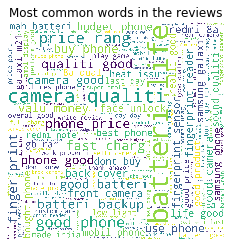

In [46]:

from wordcloud import WordCloud
wordcloud = WordCloud(height=2000, width=2000, background_color='white')
wordcloud = wordcloud.generate(' '.join(df['cleaned_reviews'].tolist()))
plt.imshow(wordcloud)
plt.title("Most common words in the reviews")
plt.axis('off')
plt.show()

In [47]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [48]:
def sentiment_analyzer_scores(sentence):
    score = analyser.polarity_scores(sentence)
    return score

In [49]:

def compound_score(text):
    comp=sentiment_analyzer_scores(text)
    return comp['compound'] # returns the compound score from the dictionary

In [50]:
df['sentiment_score']=df['reviews'].apply(lambda x:compound_score(x)) # applying on the reviews column to get the score

In [51]:
df.sample(5)

,reviews,cleaned_reviews,sentiment_score
17541,Very good phone this price and very good spe...,good phone price good specif featur pricebut ...,0.7496
13747,Excellent product and service of amazon.Only...,excel product servic amazononli con fast char...,0.3489
16518,**A Big NOO for Gaming!(4GB varient).ASPHALT...,big noo gaming4gb varientasphalt 9 lag bad hi...,0.9148
588,I purchased this product only cause my one p...,purchas product caus one plu broke couldnt ge...,-0.9113
12395,Been using it for a while after transitionin...,use transit lg g6 say impress built speed bat...,0.9180


In [52]:
def sentiment_category(score):
    if score >= 0.05:
        return "positive"
    elif score <= -0.05:
        return "negative"
    else:
        return "neutral"

In [53]:
df['review_category']=df['sentiment_score'].apply(lambda x:sentiment_category(x))

In [55]:

senti_data=pd.DataFrame.from_dict(df)
senti_data.sample(5)


,reviews,cleaned_reviews,sentiment_score,review_category
728,There is no fingerprint reader but the batte...,fingerprint reader batteri life amaz thump 50...,0.9664,positive
2532,"Battery life is less, camera clearty is norm...",batteri life less camera clearti normal porta...,-0.3089,negative
1458,The camera pictures hv a yellow tinge which ...,camera pictur hv yellow ting make orang look ...,0.3590,positive
5057,Don't buy.. Getting hang... Disgusting,dont buy get hang disgust,-0.5267,negative
19490,Battery drain too fastly and camera quality ...,batteri drain fastli camera qualiti good,-0.3412,negative


In [58]:
senti_data.to_csv('Download/mobile_sentimental_reviews2.csv',index=False)

Text(0.5, 1.0, 'Distribution of Reviews Category')

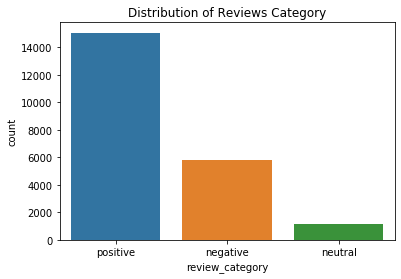

In [57]:

sns.countplot(df['review_category']).set_title("Distribution of Reviews Category")

In [24]:
positive_reviews=df.loc[df['review_category']=='positive','cleaned_reviews'].tolist() # extracting all positive reviews and converting to a list
positive_reviews[0:5]

[' updat 15082020never give chanc regret go aheadth icon look great set spherlu icon theam look better dark mode even though 6000 mah alway leav phone charg go bed like see phone 100 everi morn turn fast charg option affect batterymonst 1 batteri 55two day batteri standbi normal easy2display 4995super amaload full hd superb display3design35it a6000mah batteri still look bulki noglass bodi care put back cover opinion dont spend money glass bodi use back covers4 camera 35back camera pretti good front camera low light output low mani featur avail slow super slow video available5 osui 55android 10 one ui6fing print reader face lock 35 face lock finger print reader fast7processor perform 355exyno 9611 meant pubg gamer perfect heavi gamer lag ang hang till processor outdated8 charg 255 fast charg provid 15w charger iy take 3 hr fulli reacharg phone9 accessori 25no earphon back cover screenguard order backcov temper glass place order backbodi plastic amd prone scratches10loud speaker 155louds

In [25]:
negative_reviews=df.loc[df['review_category']=='negative','cleaned_reviews'].tolist() # extracting all negative reviews and converting to a list
negative_reviews[0:5]

[' defect product receiv get 8 12 hour charg amazon exchang product',
 ' poor perform hang aloft even dont use game app brows phone lack inspit 6 gb ram product serv zero rate pleas dont buy wastag money refund polici devic',
 ' defect product receiv get 8 12 hour charg amazon exchang product',
 ' poor perform hang aloft even dont use game app brows phone lack inspit 6 gb ram product serv zero rate pleas dont buy wastag money refund polici devic',
 ' even realm perform betterfew issu concern use were1 record slow motion videosther alway flicker screen2 fingerprint sensor need attempt work3 camera better realm good redmi4 batteri surviv one half daywhich bad till use whatsapp calli wonder happen use gaming5 heat chargenot expect world class compani phone6 mobil data connect vanish mani time dayi thought airtel network sim work old volt phonewithout issuesuggest peopl bought phonesinc compani provid screen guard pleas add screen guard soon possiblebecaus phone got littl scratch kept bike

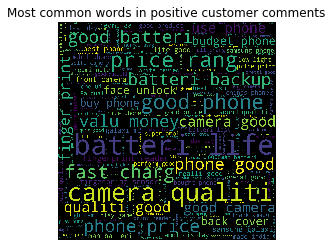

In [26]:
from wordcloud import WordCloud
wordcloud = WordCloud(height=2000, width=2000, background_color='black')
wordcloud = wordcloud.generate(' '.join(df.loc[df['review_category']=='positive','cleaned_reviews'].tolist()))
plt.imshow(wordcloud)
plt.title("Most common words in positive customer comments")
plt.axis('off')
plt.show()

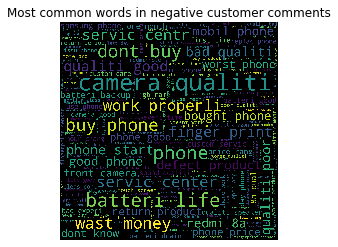

In [27]:
from wordcloud import WordCloud
wordcloud = WordCloud(height=2000, width=2000, background_color='black')
wordcloud = wordcloud.generate(' '.join(df.loc[df['review_category']=='negative','cleaned_reviews'].tolist()))
plt.imshow(wordcloud)
plt.title("Most common words in negative customer comments")
plt.axis('off')
plt.show()


In [28]:

from collections import Counter

In [29]:

def getMostCommon(reviews_list,topn=20):
    reviews=" ".join(reviews_list)
    tokenised_reviews=reviews.split(" ")
    
    
    freq_counter=Counter(tokenised_reviews)
    return freq_counter.most_common(topn) # return words with the highest frequencies

In [30]:
top_20_positive_review_words=getMostCommon(positive_reviews,20)


In [31]:
top_20_positive_review_words

[('phone', 21326),
 ('good', 16161),
 ('', 15890),
 ('camera', 10311),
 ('batteri', 9561),
 ('use', 7312),
 ('samsung', 6161),
 ('qualiti', 6096),
 ('price', 5794),
 ('mobil', 5019),
 ('charg', 4917),
 ('day', 4662),
 ('like', 4354),
 ('also', 4211),
 ('one', 3849),
 ('display', 3839),
 ('best', 3560),
 ('product', 3341),
 ('look', 3132),
 ('buy', 3130)]

In [32]:
top_20_negative_review_words=getMostCommon(negative_reviews,20)

top_20_negative_review_words

[('phone', 6379),
 ('', 6070),
 ('product', 2302),
 ('camera', 2301),
 ('qualiti', 2246),
 ('good', 2130),
 ('mobil', 2129),
 ('batteri', 1761),
 ('day', 1743),
 ('amazon', 1651),
 ('use', 1630),
 ('time', 1422),
 ('work', 1407),
 ('buy', 1390),
 ('samsung', 1381),
 ('problem', 1324),
 ('charg', 1266),
 ('bad', 1198),
 ('even', 1191),
 ('get', 1178)]

In [33]:
def plotMostCommonWords(reviews_list,topn=20,title="Common Review Words",color="blue",axis=None): #default number of words is given as 20
    top_words=getMostCommon(reviews_list,topn=topn)
    data=pd.DataFrame()
    data['words']=[val[0] for val in top_words]
    data['freq']=[val[1] for val in top_words]
    if axis!=None:
        sns.barplot(y='words',x='freq',data=data,color=color,ax=axis).set_title(title+" top "+str(topn))
    else:
        sns.barplot(y='words',x='freq',data=data,color=color).set_title(title+" top "+str(topn))

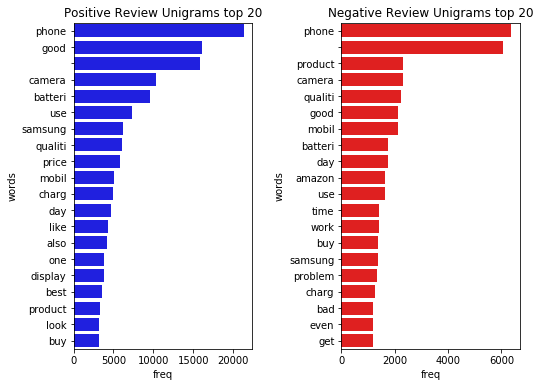

In [34]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 8,6 ## Sets the heigth and width of image


fig,ax=plt.subplots(1,2)
fig.subplots_adjust(wspace=0.5) #Adjusts the space between the two plots
plotMostCommonWords(positive_reviews,20,"Positive Review Unigrams",axis=ax[0])

plotMostCommonWords(negative_reviews,20,"Negative Review Unigrams",color="red",axis=ax[1])

In [35]:
def generateNGram(text,n):
    tokens=text.split(" ")
    ngrams = zip(*[tokens[i:] for i in range(n)])
    return ["_".join(ngram) for ngram in ngrams]

In [36]:

positive_reviews_bigrams=[" ".join(generateNGram(review,2)) for review in positive_reviews]
negative_reviews_bigrams=[" ".join(generateNGram(review,2)) for review in negative_reviews]

positive_reviews_bigrams[:5]

['_updat updat_15082020never 15082020never_give give_chanc chanc_regret regret_go go_aheadth aheadth_icon icon_look look_great great_set set_spherlu spherlu_icon icon_theam theam_look look_better better_dark dark_mode mode_even even_though though_6000 6000_mah mah_alway alway_leav leav_phone phone_charg charg_go go_bed bed_like like_see see_phone phone_100 100_everi everi_morn morn_turn turn_fast fast_charg charg_option option_affect affect_batterymonst batterymonst_1 1_batteri batteri_55two 55two_day day_batteri batteri_standbi standbi_normal normal_easy2display easy2display_4995super 4995super_amaload amaload_full full_hd hd_superb superb_display3design35it display3design35it_a6000mah a6000mah_batteri batteri_still still_look look_bulki bulki_noglass noglass_bodi bodi_care care_put put_back back_cover cover_opinion opinion_dont dont_spend spend_money money_glass glass_bodi bodi_use use_back back_covers4 covers4_camera camera_35back 35back_camera camera_pretti pretti_good good_front f

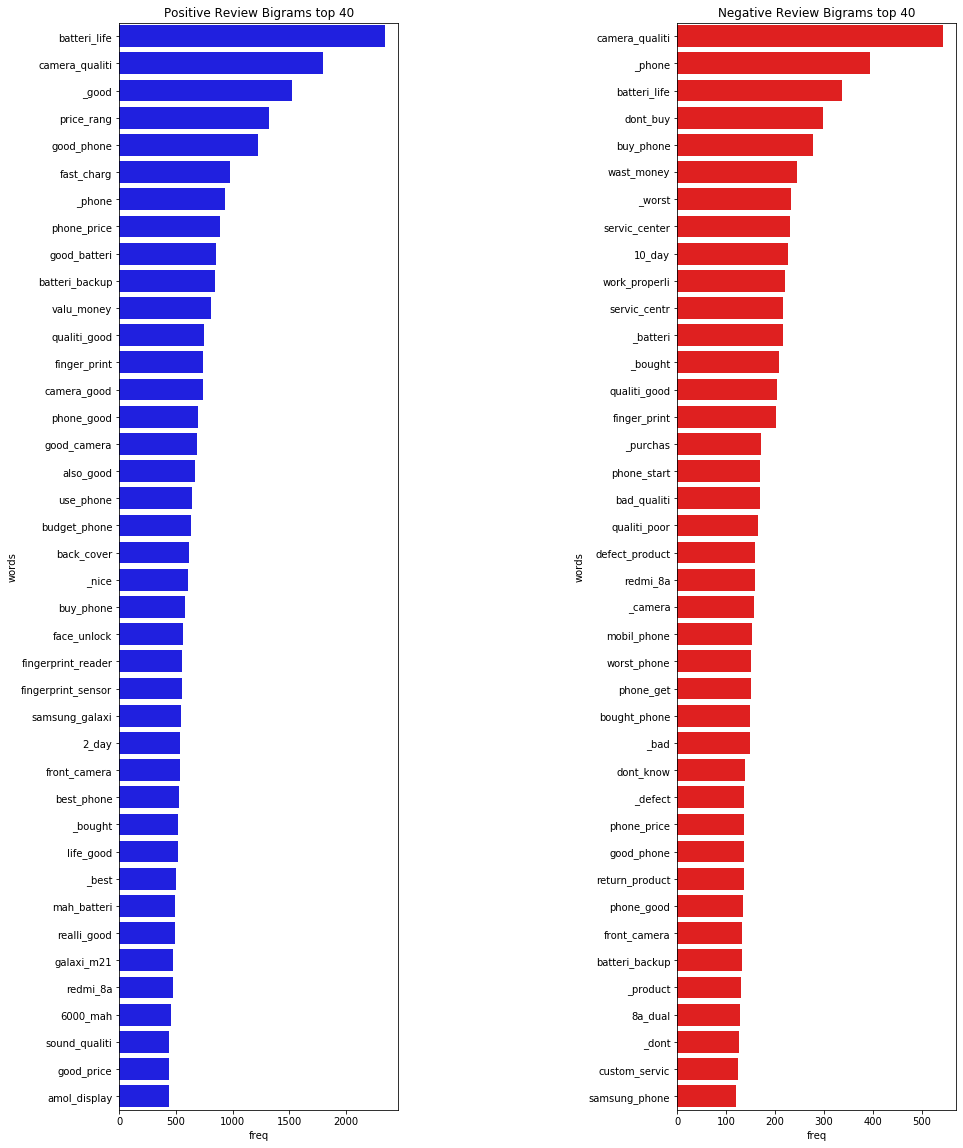

In [37]:
rcParams['figure.figsize'] = 15,20
fig,ax=plt.subplots(1,2)
fig.subplots_adjust(wspace=1)
plotMostCommonWords(positive_reviews_bigrams,40,"Positive Review Bigrams",axis=ax[0])

plotMostCommonWords(negative_reviews_bigrams,40,"Negative Review Bigrams",color="red",axis=ax[1])

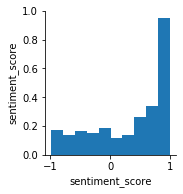

In [40]:

sns.pairplot(df)